<a href="https://colab.research.google.com/github/ajiteshchanna/MielagePrediction_Internship_Project/blob/main/Mielage_Prediction_Ybi_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mielage Prediction Project
The objective of this project is to predict a vehicle's mileage (mpg) based on its horsepower, number of cylinders, displacement, weight, and acceleration. This is a multiple linear regression project. I have chosen to use the Random Forests model because it provides the highest accuracy.

Dependent Variable:

Miles per gallon (mpg)
Independent Variables:

Horsepower
Number of cylinders
Displacement
Weight
Acceleration

Data Source: Ybi Foundation GitHub https://github.com/YBI-Foundation/Dataset/raw/main/MPG.csv

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# reading dataset
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/MPG.csv')

In [ ]:
df.head(20)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,usa,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,usa,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,usa,amc ambassador dpl


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


##Data Pre-processing

In [ ]:
df = df.dropna(subset=['horsepower'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


#Data Visualization

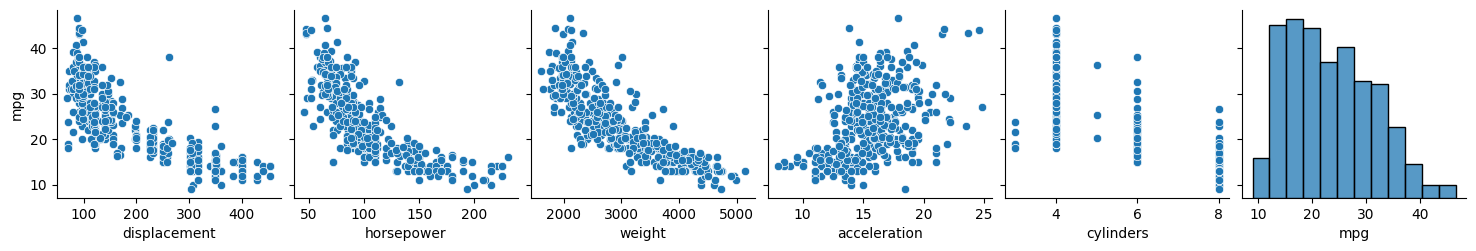

In [ ]:
sns.pairplot(df,x_vars = ['displacement','horsepower','weight','acceleration','cylinders','mpg'],y_vars=['mpg'])

##Defining variables x(independent) and y(dependent)

In [ ]:
y = df['mpg']
x = df[['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year']]

##Split

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=2529)

##Model Selection

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [ ]:
# Training the model
model.fit(x_train,y_train)

RandomForestRegressor()

##Prediction

In [ ]:
y_prediction = model.predict(x_test)
y_prediction # printing the predicted values

array([18.132, 17.001, 14.05 , 27.4  , 26.34 , 21.702, 23.984, 20.883,
       15.275, 13.745, 28.844, 33.971, 30.555, 28.2  , 16.12 , 16.121,
       23.87 , 34.024, 28.711, 31.772, 15.744, 20.065, 20.573, 27.07 ,
       20.87 , 13.205, 19.131, 15.59 , 21.411, 14.74 , 19.868, 17.751,
       11.706, 26.181, 17.997, 33.807, 20.541, 21.042, 13.8  , 13.9  ,
       18.269, 18.963, 12.21 , 18.269, 18.452, 28.317, 13.57 , 23.525,
       26.34 , 18.885, 18.369, 19.262, 20.724, 35.76 , 12.65 , 13.185,
       23.97 , 20.812, 19.749, 35.543, 18.537, 25.745, 18.865, 13.99 ,
       21.825, 24.073, 16.66 , 21.453, 36.567, 14.05 , 25.099, 19.475,
       12.39 , 34.913, 31.265, 33.017, 35.387, 12.46 , 24.349, 14.155,
       26.969, 26.485, 16.322, 30.786, 33.624, 35.905, 13.99 , 29.495,
       28.158, 33.441, 36.599, 34.129, 33.887, 33.065, 18.918, 29.481,
       22.975, 34.721])

##Model Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = 100*mean_absolute_percentage_error(y_test,y_prediction)
accuracy = 100-mape
print(f"Accuracy : {accuracy}")

Accuracy : 92.00951434717334


Here, I am getting 92.00 % accuracy, so the model is 92% accurate.

##Plotting Regression Graph
Here, I am plotting a regression graph between independent and dependent variable. Since this is a problem of multiple linear regression, we can plot various graphs showing relation between the dependent variable(mpg) with the corresponding dependent varible.

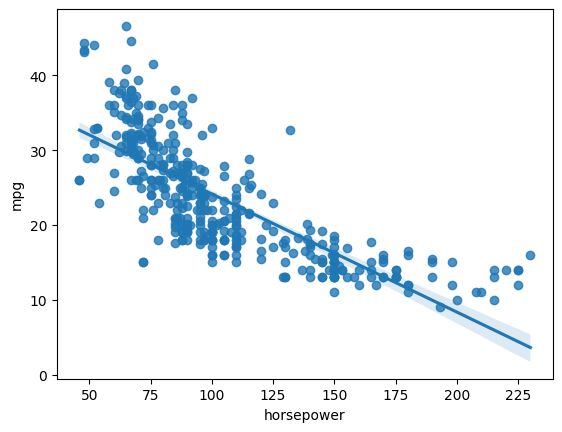

In [ ]:
# MPG v/s horspower
sns.regplot(data=df,x=df['horsepower'],y=df['mpg'])
plt.show()

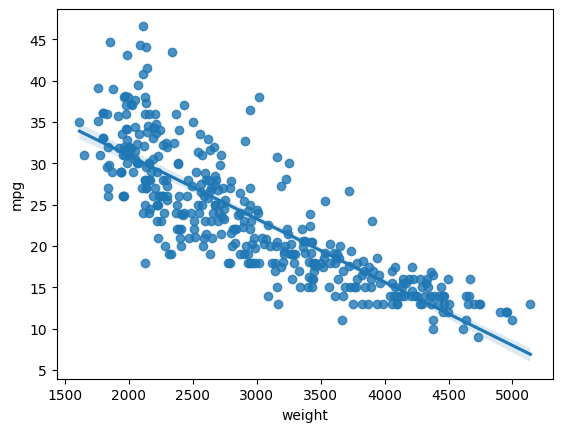

In [ ]:
# MPG v/s weight
sns.regplot(data=df,x=df['weight'],y=df['mpg'])
plt.show()

<Axes: xlabel='cylinders', ylabel='mpg'>

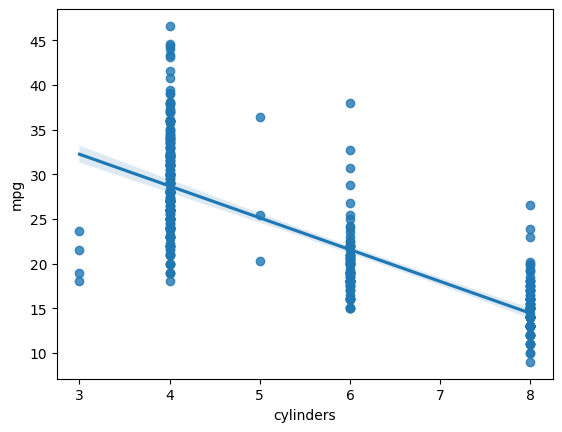

In [ ]:
# MPG v/s cylinders
sns.regplot(data=df,x=df['cylinders'],y=df['mpg'])

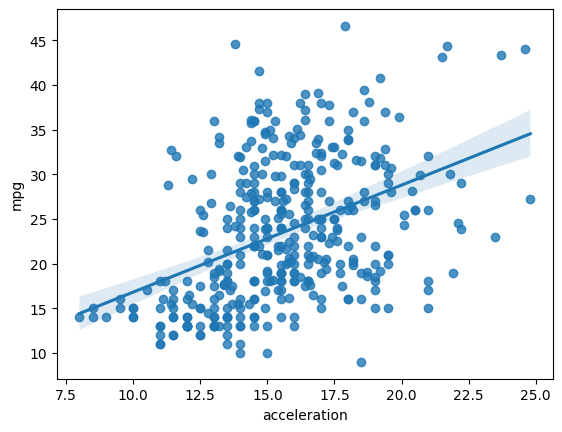

In [ ]:
# MPG v/s acceleration
sns.regplot(data=df,y=df['mpg'],x=df['acceleration'])
plt.show()

<Axes: xlabel='displacement', ylabel='mpg'>

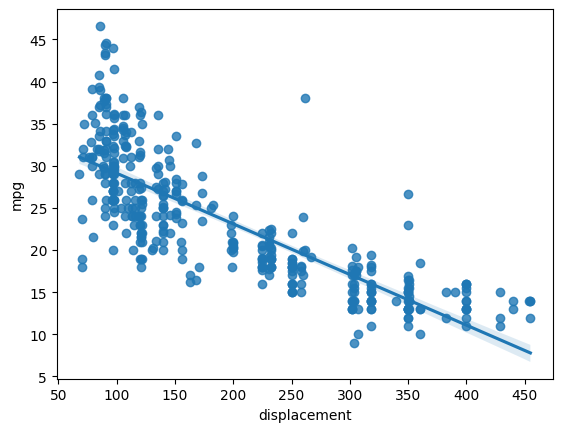

In [ ]:
# MPG v/s displacement
sns.regplot(data=df,y=df['mpg'],x=df['displacement'])

#Explanation
Using the pandas library, I stored the data from MPG.csv in a dataframe named df.

The second step involves data visualization, which reveals some missing values. Since these missing values constitute less than 5% of the data, it is acceptable to drop them using the dropna() function.

Next, I defined the dependent variable (y) and the independent variables (x).

Following this, the data is split into training and testing sets, typically in a 75% to 25% ratio.

The model chosen for performing multiple linear regression is the RandomForestRegressor.

The subsequent step involves training the model on the training data (x_train, y_train) using the model.fit() function.

After training, the model is tested on the test data (25%) using the model.predict() function, which predicts the mileage (mpg) of the vehicle. The results are stored in the variable y_prediction.

The variable y_prediction is then used in the evaluation step to determine the model's error and accuracy, which are found to be 8% and 92%, respectively.

The final step is to plot regression graphs. Since this is a multiple linear regression problem, I have plotted several graphs to show the variation of mileage (mpg) with various independent variables.

